The purpose of this notebook is to serve as a first exploration into GORG-Dark metadata and showcase how to use a jupyter notebook.

In [1]:
import pandas as pd
from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt

Let's load the GORG-Dark metadata table.  

This CSV version has been taken from the original excel file, and cleaned up a bit. To see what was done to clean up this table, you can [here]().

In [7]:
df = pd.read_csv("SAG_summary_20221107_cleaned.csv")
df.columns

In [42]:
df.describe()

,latitude,longitude,cell_diameter_µm,side_scatter,forward_scatter,X531.40_488,X572.27_488,X692.40_488,WGA-X_cp,raw_read_count,...,completeness_CheckM2,estimated_genome_size_CheckM2,coding_density,CDS,perc_CDS_annotated,av_CDS_length,rRNA,tRNA,clusters_antiSMASH,depth_m
count,9178.000000,9178.000000,8996.000000,9178.000000,9178.000000,9178.000000,9178.000000,9178.000000,9178.000000,9.178000e+03,...,9178.000000,9.178000e+03,9178.000000,9178.000000,9178.000000,9178.000000,9178.000000,9178.000000,9178.000000,8944.000000
mean,15.129222,15.244607,0.372350,61.786882,38.651449,423.723578,43.265962,32.030072,2.164195,4.770639e+06,...,40.057638,2.155709e+06,92.494988,785.557093,56.540096,867.417084,1.312051,15.625844,0.506537,1960.337657
std,36.277605,103.581365,0.249107,410.563376,182.713971,446.810122,46.968436,34.860452,0.806041,2.027668e+06,...,19.444566,1.191404e+06,2.877702,434.283475,10.174621,98.139516,1.257528,8.006516,0.855477,2036.672071
min,-81.000000,-158.000000,0.120000,1.000000,1.000000,4.000000,1.000000,1.000000,0.970000,7.727900e+04,...,5.000000,2.436260e+05,77.000000,67.000000,24.000000,579.000000,0.000000,0.000000,0.000000,100.000000
25%,-3.000000,-46.000000,0.240000,12.000000,5.000000,175.000000,19.000000,14.000000,1.780000,3.301212e+06,...,24.000000,1.308639e+06,91.000000,475.000000,50.000000,787.000000,0.000000,9.000000,0.000000,500.000000
50%,18.000000,-11.000000,0.290000,21.000000,8.000000,294.000000,30.000000,24.000000,2.070000,4.728454e+06,...,37.000000,1.668813e+06,93.000000,699.000000,54.000000,871.000000,1.000000,14.000000,0.000000,1000.000000
75%,45.000000,111.000000,0.420000,38.000000,21.000000,536.000000,50.000000,37.000000,2.420000,6.097672e+06,...,54.000000,2.654567e+06,95.000000,994.750000,66.000000,929.000000,3.000000,21.000000,1.000000,3000.000000
max,89.000000,180.000000,3.390000,9432.000000,5319.000000,9419.000000,983.000000,732.000000,15.940000,1.337673e+07,...,99.000000,9.786923e+06,98.000000,4642.000000,82.000000,1230.000000,6.000000,56.000000,11.000000,10899.000000


Tutorials for the week are generally going to focus on two plates from GORG-Dark:  
* AM-390
* AM-388

Let's create a smaller dataframe looking at just these plates. 

In [10]:
plates_of_interest = ['AM-390', 'AM-388']

# create a smaller dataframe with just our plates of interest
sdf = df[df['plate'].isin(plates_of_interest)]

Where do these samples come from?

In [13]:
sdf[['field_sample_PI', 'geographic_region', 'expedition',
       'station_name', 'field_sample', 'latitude', 'longitude', 'depth']].drop_duplicates()

,field_sample_PI,geographic_region,expedition,station_name,field_sample,latitude,longitude,depth
8749,Juergens,Baltic Sea,IOW,271,200,57,20,200
8947,Juergens,Baltic Sea,IOW,271,100,57,20,100


How many SAGs does each sample (plate) have:

<Axes: xlabel='plate', ylabel='count'>

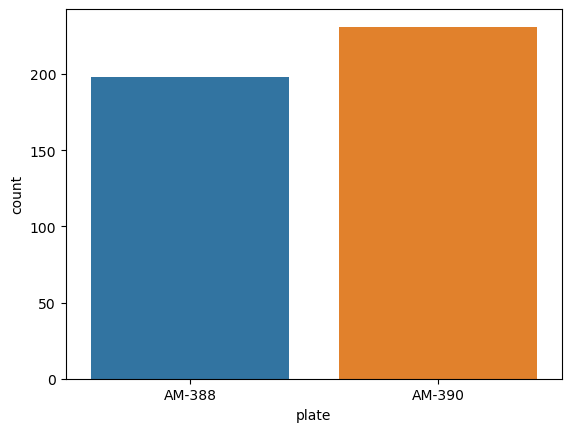

In [35]:
sns.countplot(x = 'plate', data = sdf)

What are the most common taxa?

In [43]:
Counter(sdf['gtdb_classification']).most_common()[:15]

[('d__Archaea;p__Thermoproteota;c__Nitrososphaeria;o__Nitrososphaerales;f__Nitrosopumilaceae;g__Nitrosopumilus;s__',
  21),
 ('d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Flavobacteriaceae;g__CG1-02-35-72;s__CG1-02-35-72 sp013205245',
  18),
 ('d__Bacteria;p__Desulfobacterota;c__Desulfobacteria;o__Desulfobacterales;f__Desulfobacteraceae;g__Desulfobacula;s__',
  17),
 ('d__Bacteria;p__Marinisomatota;c__UBA8477;o__UBA8477;f__UBA8477;g__JABMPR01;s__JABMPR01 sp016784545',
  15),
 ('d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__;g__;s__',
  14),
 ('d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__PS1;f__Thioglobaceae;g__Thioglobus;s__',
  12),
 ('d__Bacteria;p__Campylobacterota;c__Campylobacteria;o__Campylobacterales;f__Sulfurimonadaceae;g__Sulfurimonas;s__',
  12),
 ('d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__F082;g__GCA-002708315;s__',
  11),
 ('d__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Nanopelagicales;f__S36-B12

Shown as a barplot:

<Axes: >

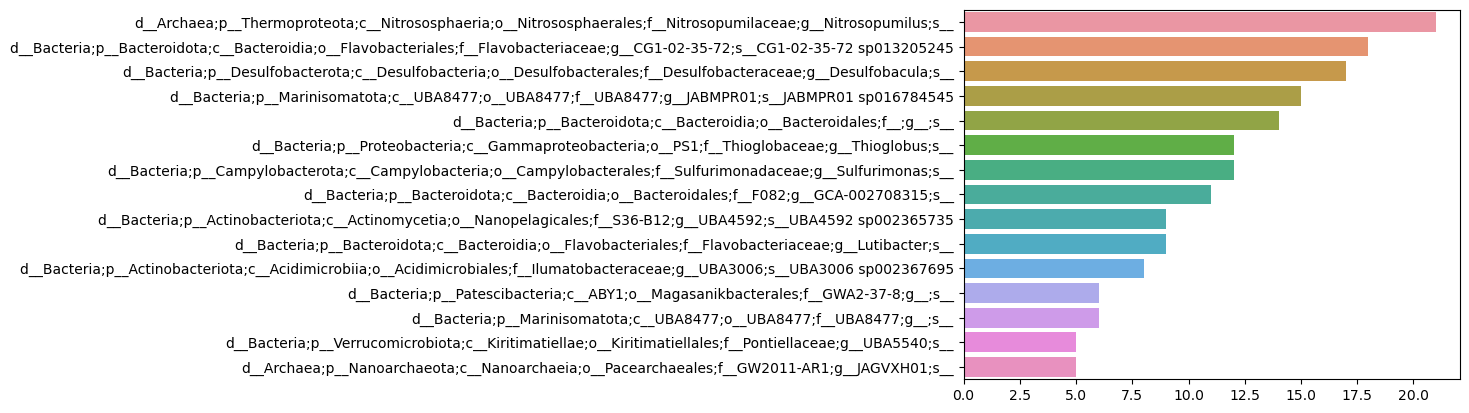

In [44]:
top_gtdb = Counter(sdf['gtdb_classification']).most_common()[:15]

sns.barplot(y = [i[0] for i in top_gtdb], x = [i[1] for i in top_gtdb])

How many bacterial and archeal SAGs are present?

<Axes: ylabel='count'>

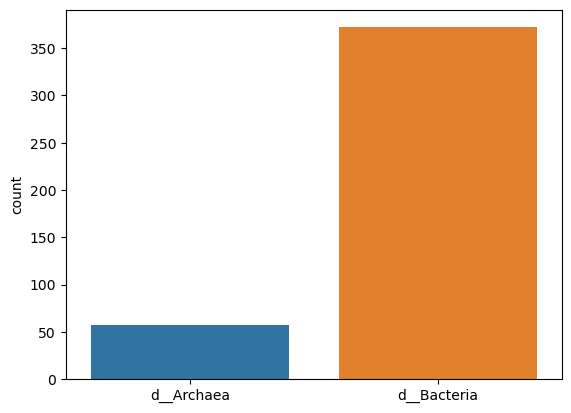

In [45]:
sns.countplot(x = [i.split(";")[0] for i in sdf['gtdb_classification']])

How do assembly lengths look?

<Axes: xlabel='assembly_length', ylabel='Count'>

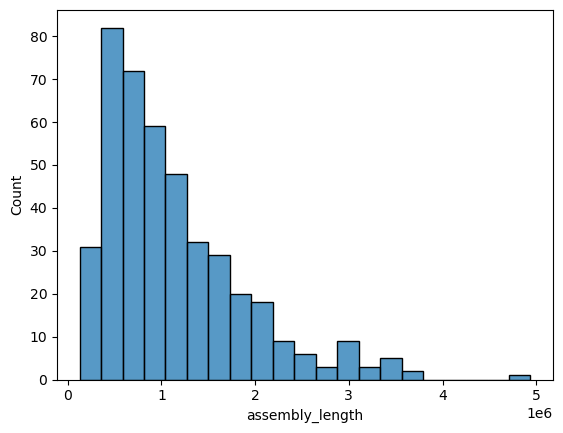

In [38]:
sns.histplot(sdf['assembly_length'])

Does assembly length differ by plate?

<Axes: xlabel='plate', ylabel='assembly_length'>

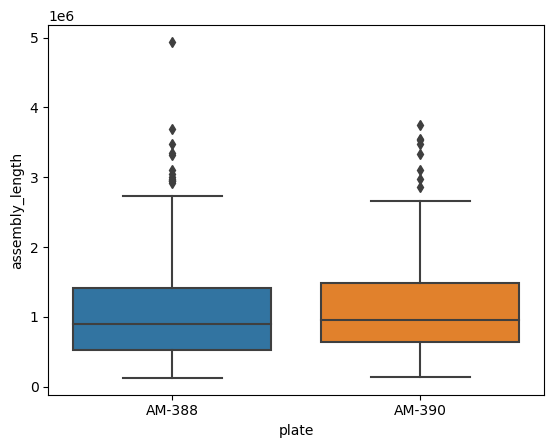

In [39]:
sns.boxplot(x = 'plate', y = 'assembly_length', data = sdf)

Let's look at a couple different pieces of information together...

<Axes: xlabel='assembly_length', ylabel='completeness_CheckM2'>

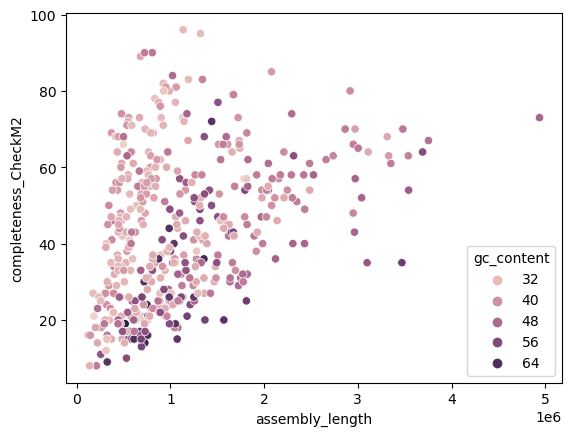

In [40]:
sns.scatterplot(x = 'assembly_length', y = 'completeness_CheckM2', hue = 'gc_content', data = sdf)